# NER

In [1]:
import spacy
# Load the required model
nlp = spacy.load('en_core_web_sm')

# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Sundar Pichai PERSON
Google ORG
Mountain View GPE


In [10]:
def find_persons(text):
  doc = nlp(text)
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  return persons
def find_org(text):
  doc = nlp(text)
  persons = [ent.text for ent in doc.ents if ent.label_ == 'ORG']
  return persons
    
print(find_persons(text))
print(find_org(text))

['Sundar Pichai']
['Google']


In [13]:
text2 = "Tesla raised $1.5 billion in funding on January 30, 2021."
doc = nlp(text2)
for ent in doc.ents:
    if ent.label_ in ["DATE", "MONEY"]:
        print(ent.text,ent.label_)

$1.5 billion MONEY
January 30, 2021 DATE


# Word Vectors

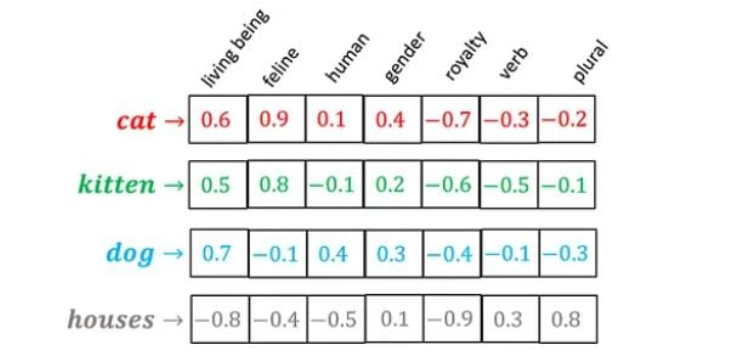

In [55]:
from IPython.display import Image
Image("wordvec1.png")

In [21]:
md_nlp = spacy.load("en_core_web_md")
lg_nlp = spacy.load("en_core_web_lg")
print("Number of words in medium: ", md_nlp.meta["vectors"]["vectors"], "\n")
print("Dimension of word vectors in medium: ", md_nlp.meta["vectors"]["width"],"\n")
print("Number of words in large: ", lg_nlp.meta["vectors"]["vectors"], "\n")
print("Dimension of word vectors in large: ", lg_nlp.meta["vectors"]["width"],"\n")

Number of words in medium:  20000 

Dimension of word vectors in medium:  300 

Number of words in large:  514157 

Dimension of word vectors in large:  300 



In [29]:
words = ["like", "love"]
ids = [md_nlp.vocab.strings[w] for w in words]
word_vectors = [md_nlp.vocab.vectors[i][:10] for i in ids]
print(word_vectors)

[array([-2.3334 , -1.3695 , -1.133  , -0.68461, -1.8482 , -0.63712,
        2.6791 ,  4.1433 , -2.5616 , -1.8061 ], dtype=float32), array([ 2.0565 , -3.2259 , -5.7364 , -6.146  ,  0.15748, -2.4284 ,
        7.658  ,  2.7064 , -2.211  , -0.8999 ], dtype=float32)]


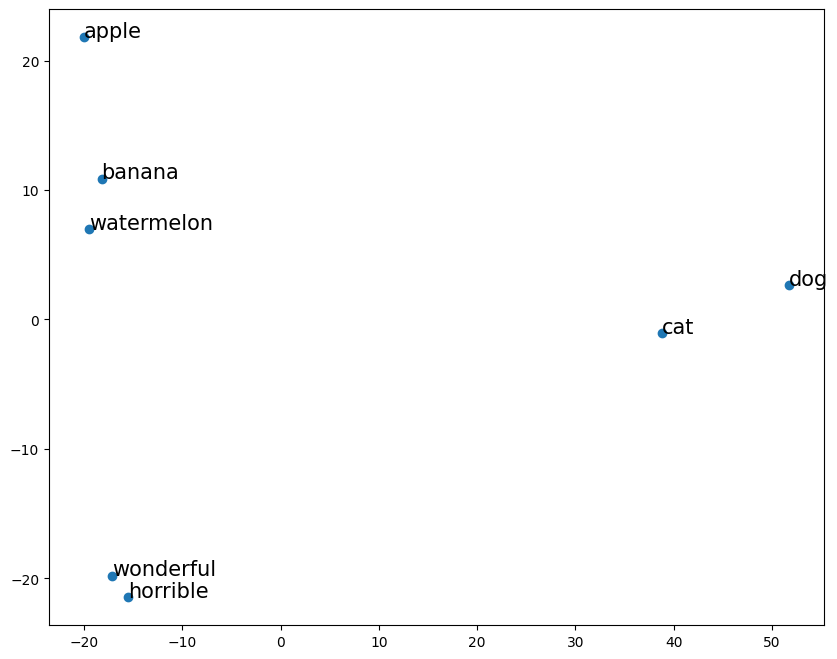

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
words =["wonderful","horrible","apple","banana","watermelon","dog","cat"]
word_vectors=[md_nlp.vocab.vectors[md_nlp.vocab.strings[w]] for w in words]
stacked=np.vstack(word_vectors)
pca = PCA(n_components=2)
word_vecotrs_trasformed=pca.fit_transform(word_vectors)
plt.figure(figsize=(10,8))
plt.scatter(word_vecotrs_trasformed[:,0],word_vecotrs_trasformed[:,1])
for word , coord in zip(words, word_vecotrs_trasformed):
    x,y=coord
    plt.text(x,y,word,size=15)

# Cosine Similarty

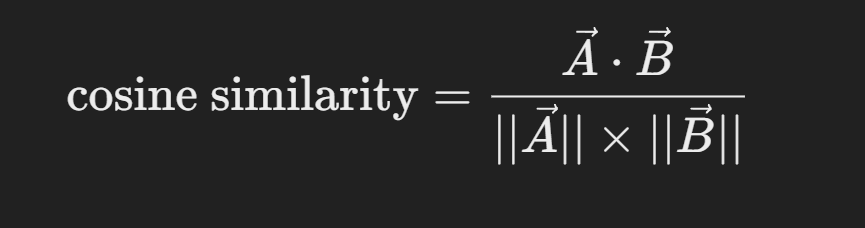

In [58]:
from IPython.display import Image
Image("cosine-similarity-formula.png")

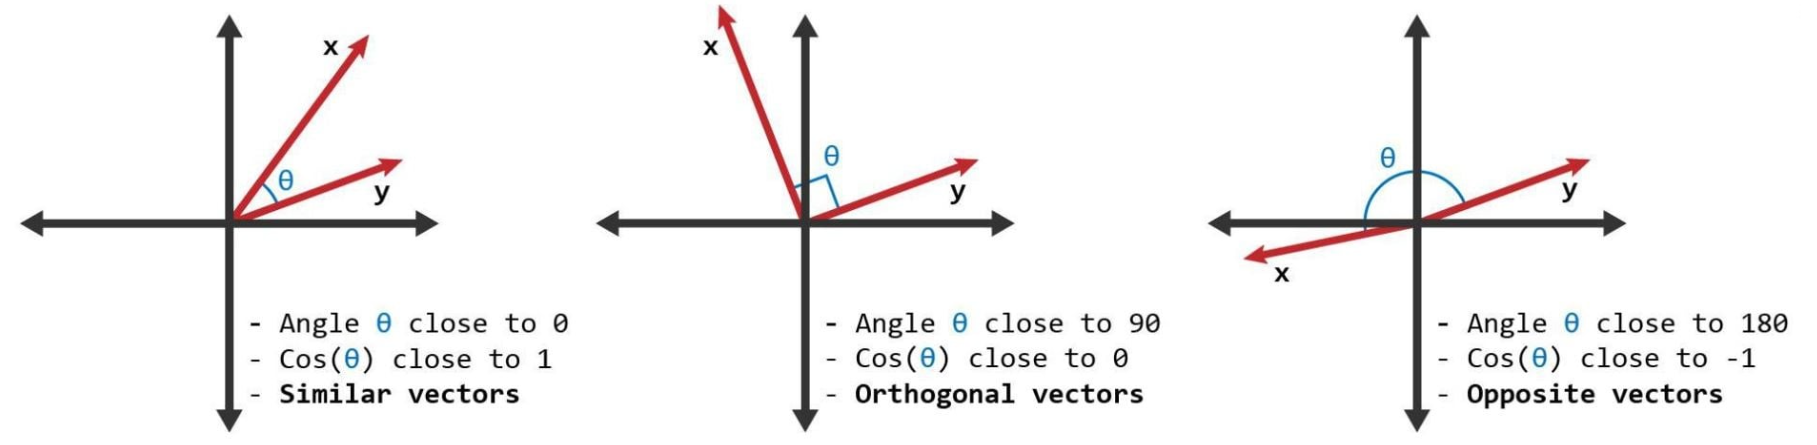

In [56]:
from IPython.display import Image
Image("cosine similarty.png")

In [57]:
texts=['I like the Vitality canned dog food products.',
 'The peanuts were actually small sized unsalted. Not sure if this was an error.',
 'It is a light, pillowy citrus gelatin with nuts - in this case Filberts.',
 'the Root Beer Extract I ordered is very medicinal.',
 'Great taffy at a great price.']
documents = [md_nlp(t) for t in texts]
category = "canned dog food"
category_document = md_nlp(category)
for i, doc in enumerate(documents):
  print(f"Semantic similarity with document {i+1}:", round(doc.similarity(category_document), 3))

Semantic similarity with document 1: 0.761
Semantic similarity with document 2: 0.37
Semantic similarity with document 3: 0.338
Semantic similarity with document 4: 0.394
Semantic similarity with document 5: 0.314
